$$f(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$$

$$h(x) = e^{-\frac{x^2}{2}}$$

Chcemy generować punkty $(x, y)$ z rozkładu jednostajnego na zbiorze
$$D = \left\{(x, y) \colon 0 < x < \sqrt{h\left(\frac{y}{x}\right)}\right\}$$
Aby wiedzieć jakie $(x, y)$ generować, by sprawdzać dla nich powyższy warunek, znajdźmy prostokąt ograniczający $D$.

Oznaczmy $t = \frac{y}{x}$.

 $\textcolor{orange}{\text{Udajemy, że t nie zależy od x, bo nie ważne jakie x weźmiemy, wartość t możemy dowolnie zmienić przez y.}}$

Maksimum $\sqrt{e^{-t^2 / 2}}$ to $1$ dla $t = 0 \; \Rightarrow \; y = 0$. Zatem $0 < x < 1$. Ponadto

$$0 < x < \sqrt{e^{-t^2 / 2}}$$

$$0 <  \frac{y}{t} < \sqrt{e^{-t^2 / 2}}$$

$\textcolor{orange}{\text{Teraz udajemy, że t nie zależy od y.}}$
$$
\begin{cases}
y < \phantom{-}t\sqrt{e^{-t^2 / 2}} \quad \text{ gdy }  t > 0 \\
y > -t\sqrt{e^{-t^2 / 2}} \quad \text{ gdy }  t < 0 \\
\end{cases}
$$

Funkcja $t\sqrt{e^{-t^2 / 2}}$ osiąga maksimum równe $\sqrt{\frac{2}{e}}$.

Funkcja $-t\sqrt{e^{-t^2 / 2}}$ osiąga minimum równe $-\sqrt{\frac{2}{e}}$.

Tak więc $-\sqrt{\frac{2}{e}} < y < \sqrt{\frac{2}{e}}$.

Desmos: https://www.desmos.com/calculator/xjdjehk47w

In [14]:
import numpy as np
import matplotlib.pyplot as plt

Normal

In [15]:
def normal(n):
    samples = np.zeros(n)
    i = 0
    u2_bound = np.sqrt(2)*np.exp(-0.5) # √(2/e) do zmiennej, żeby nie liczyć tego samego 2 razy
    while i < n:
        u1 = np.random.rand() # 0 < x < 1
        u2 = np.random.uniform(-u2_bound, u2_bound) # -√(2/e) < y < √(2/e)
        if u1 < np.sqrt(np.exp(-(u2/u1)**2/2)):
            samples[i] = u2/u1
            i += 1
    return samples

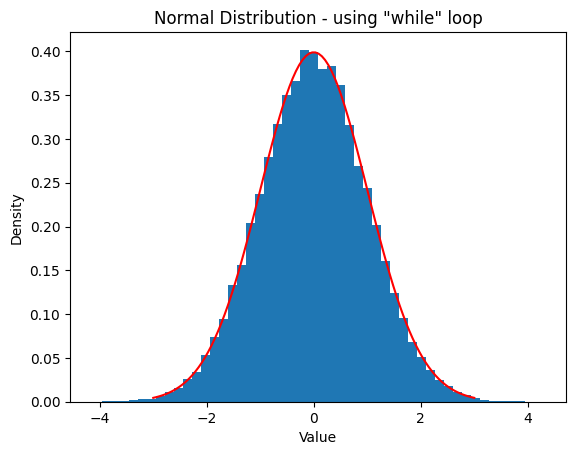

In [24]:
plt.hist(normal(30000), bins=50, density=True)
plt.title('Normal Distribution - using "while" loop')
plt.xlabel('Value')
plt.ylabel('Density')
xs = np.linspace(-3, 3, 100)
plt.plot(xs, 1/np.sqrt(2*np.pi)*np.exp(-xs**2/2), color="red")

Recursive method

In [6]:
u2_bound = np.sqrt(2)*np.exp(-0.5) # √(2/e) do zmiennej, żeby nie liczyć tego samego 2 razy

In [9]:
def generator(y_bound):
    x = np.random.rand() # 0 < x < 1
    y = np.random.uniform(-y_bound, y_bound) # -√(2/e) < y < √(2/e)
    z = np.sqrt(np.exp(-(y/x)**2/2))
    if x < z:
        w = y/x
        return w
    else:
        generator(y_bound)

In [12]:
def normal_recursive(n):
    samples = np.zeros(n)
    u2_bound = np.sqrt(2)*np.exp(-0.5) # √(2/e) do zmiennej, żeby nie liczyć tego samego 2 razy
    for i in range(n):
        samples[i] = generator(u2_bound)
    return samples

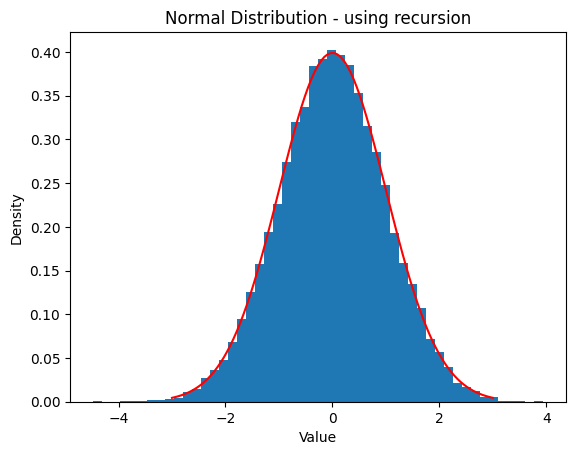

In [23]:
plt.hist(normal_recursive(30000), bins=50, density=True)
plt.title('Normal Distribution - using recursion')
plt.xlabel('Value')
plt.ylabel('Density')
xs = np.linspace(-3, 3, 100)
plt.plot(xs, 1/np.sqrt(2*np.pi)*np.exp(-xs**2/2), color="red")